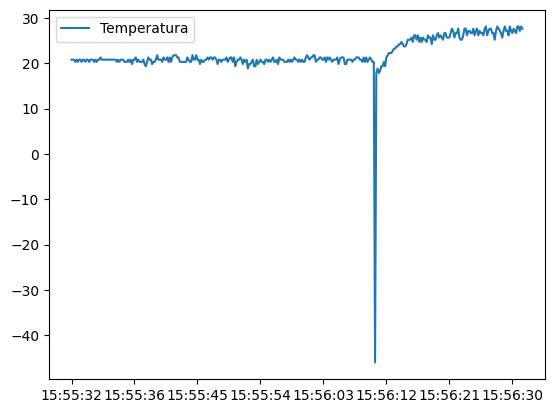

In [4]:
import serial
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
import time

T = serial.Serial('COM3',9600)

temperature = []
dt_string = []
tiempo_maximo = int(input("Ingrese el tiempo máximo de ejecución en segundos: "))
tiempo_finalizacion = time.time() + tiempo_maximo

while time.time() < tiempo_finalizacion:
    sArduino = T.readline()
    s = sArduino.decode('UTF-8')
    temperature.append(float(s[0:5]))
    now = datetime.now()
    dt_string.append(now.strftime("%H:%M:%S"))
    print(temperature[-1])
    clear_output(wait=True)

temperature = np.array(temperature)
dt = np.array(dt_string)

data = pd.DataFrame(temperature, index=dt)
data.columns = ['Temperatura']

data.plot()

data.to_csv('datos.csv', index=True)
T.close()